In [1]:
!pip install mediapipe

Handedness: [classification {
  index: 1
  score: 0.970311761
  label: "Right"
}
]
hand_landmarks: landmark {
  x: 0.610345602
  y: 0.841573596
  z: 1.22207291e-06
}
landmark {
  x: 0.410540342
  y: 0.787257552
  z: -0.0797175765
}
landmark {
  x: 0.27940172
  y: 0.684953332
  z: -0.114543535
}
landmark {
  x: 0.183802128
  y: 0.603935
  z: -0.14402698
}
landmark {
  x: 0.0830517411
  y: 0.549946189
  z: -0.175202906
}
landmark {
  x: 0.440192699
  y: 0.517389417
  z: -0.0492876321
}
landmark {
  x: 0.380652428
  y: 0.384953588
  z: -0.102632008
}
landmark {
  x: 0.345463276
  y: 0.301602483
  z: -0.154741243
}
landmark {
  x: 0.319109678
  y: 0.228035361
  z: -0.196874052
}
landmark {
  x: 0.554634333
  y: 0.504618585
  z: -0.0609191097
}
landmark {
  x: 0.526990592
  y: 0.352633834
  z: -0.111866787
}
landmark {
  x: 0.509996295
  y: 0.251017392
  z: -0.166128933
}
landmark {
  x: 0.495744795
  y: 0.167966306
  z: -0.207534194
}
landmark {
  x: 0.659724712
  y: 0.52379787
  z: -0.086

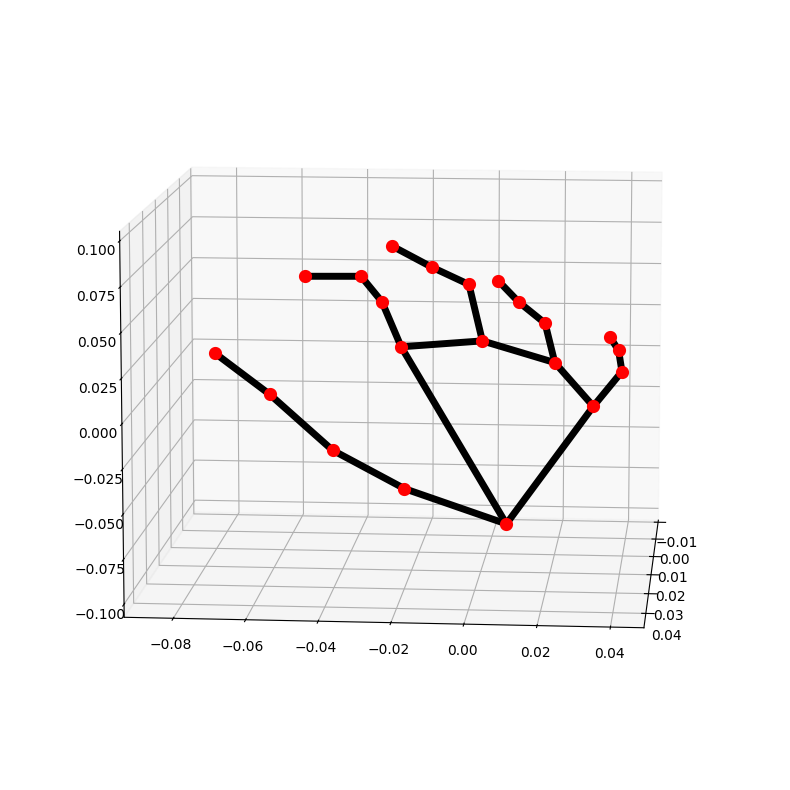

Handedness: [classification {
  index: 1
  score: 0.929447174
  label: "Right"
}
]
hand_landmarks: landmark {
  x: 0.4317635
  y: 0.614076376
  z: 3.13315127e-07
}
landmark {
  x: 0.415203184
  y: 0.497629642
  z: -0.0332462117
}
landmark {
  x: 0.433262169
  y: 0.369414657
  z: -0.0453746133
}
landmark {
  x: 0.458033293
  y: 0.271353126
  z: -0.056518849
}
landmark {
  x: 0.470037699
  y: 0.193893835
  z: -0.0659281239
}
landmark {
  x: 0.531575501
  y: 0.347164392
  z: -0.0108605139
}
landmark {
  x: 0.590058923
  y: 0.277667165
  z: -0.0333934203
}
landmark {
  x: 0.634970903
  y: 0.251289308
  z: -0.0556709245
}
landmark {
  x: 0.66835171
  y: 0.237388313
  z: -0.0711162463
}
landmark {
  x: 0.562283933
  y: 0.399015874
  z: -0.0109609747
}
landmark {
  x: 0.62242353
  y: 0.329529405
  z: -0.0389731601
}
landmark {
  x: 0.656525493
  y: 0.320938677
  z: -0.0653805435
}
landmark {
  x: 0.659183919
  y: 0.343676329
  z: -0.0800528154
}
landmark {
  x: 0.580134392
  y: 0.462000251
  

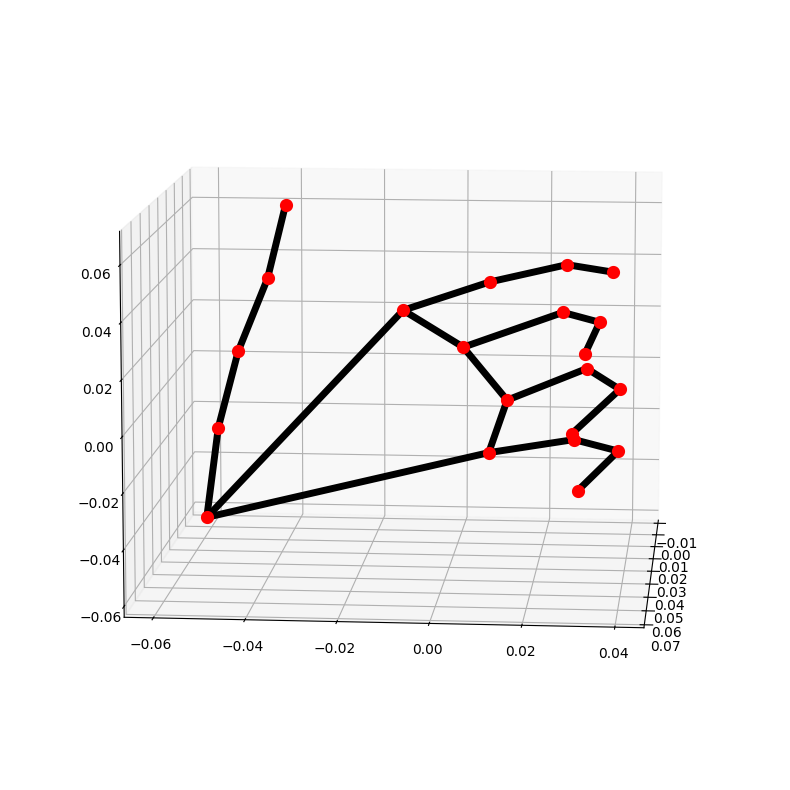

In [3]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
IMAGE_FILES = ["/content/hand.jpg", "/content/hand2.jpeg"]
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()